In [1]:
from pathlib import Path
import isthmuslib as isli

## Indicate path of data

In [2]:
audio_path: Path = Path.cwd() / 'data' / 'tB-kOE__X2o.csv'

Start and stop times of experiment

In [3]:
start_time_sec: float = 2 * 60 + 40
stop_time_sec: float = 3 * 60 + 10
audio_duration_sec: float = 5 * 60 + 33

## Load in the data

In [4]:
full_recording: isli.Timeseries = isli.Timeseries(basis_col_name='timestamp')
full_recording.read_csv(audio_path)
full_recording.data.rename(columns={'Unnamed: 0':'sample_index'}, inplace=True)
full_recording.data['timestamp'] = full_recording.data['sample_index'] * audio_duration_sec / len(full_recording)

## Review data

In [5]:
full_recording.data.describe()

,sample_index,signal,timestamp
count,5.328144e+06,5.328144e+06,5.328144e+06
mean,2.664072e+06,7.559725e-07,1.665000e+02
std,1.538103e+06,4.491217e-02,9.612883e+01
min,0.000000e+00,-7.905719e-01,0.000000e+00
25%,1.332036e+06,-1.028754e-02,8.324998e+01
50%,2.664072e+06,-1.154585e-04,1.665000e+02
75%,3.996107e+06,8.776392e-03,2.497500e+02
max,5.328143e+06,8.604704e-01,3.329999e+02


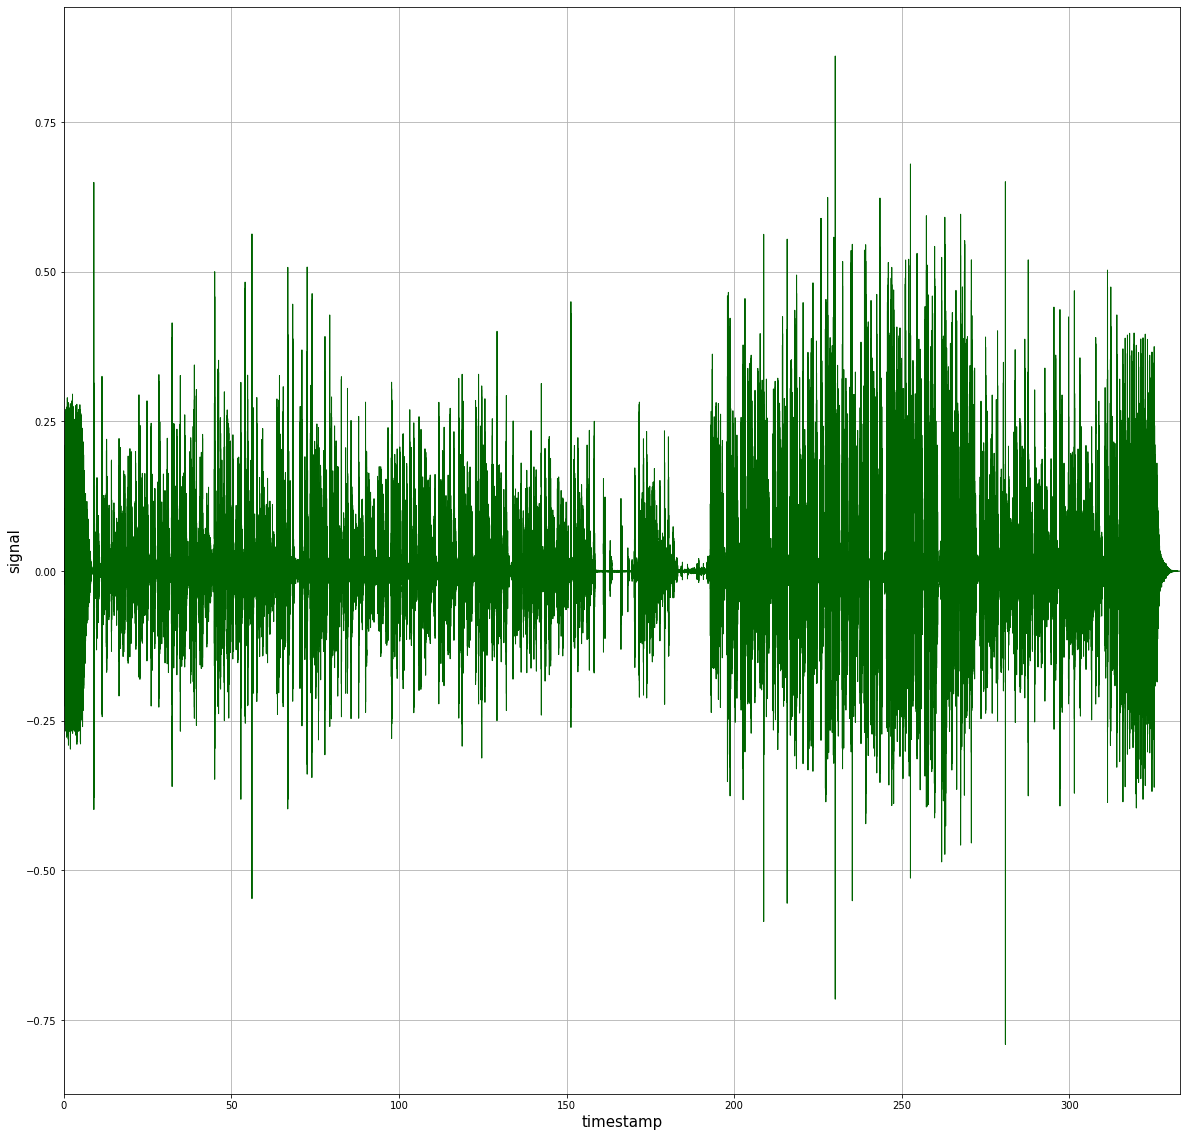

In [6]:
full_recording.plot('signal', linewidth=1, figsize=(20, 20));

## Trim down to a 30 sec experiment

In [7]:
experiment: isli.VectorSequence = full_recording.slice(
    start_at=start_time_sec,
    stop_at=stop_time_sec,
    inplace=False,
    reset_index=True
)
experiment.data.head()

,sample_index,signal,timestamp
0,2560070,0.000158,160.000051
1,2560071,0.000101,160.000113
2,2560072,0.000001,160.000176
3,2560073,-0.000064,160.000238
4,2560074,0.000059,160.000301


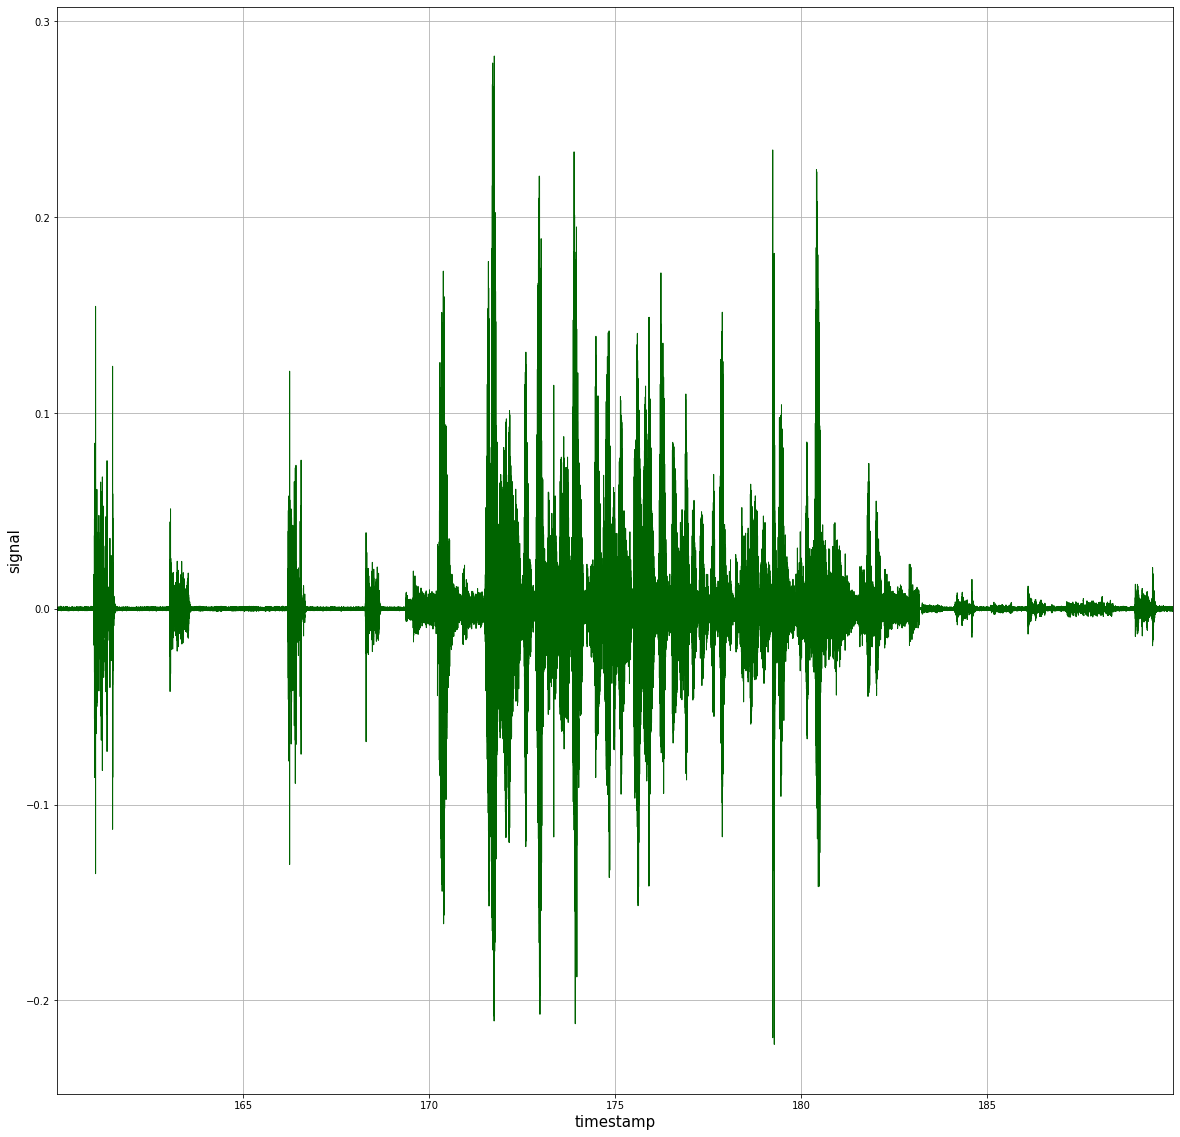

In [8]:
experiment.plot('signal', linewidth=1, figsize=(20, 20));

## Look at just the autofocus noise

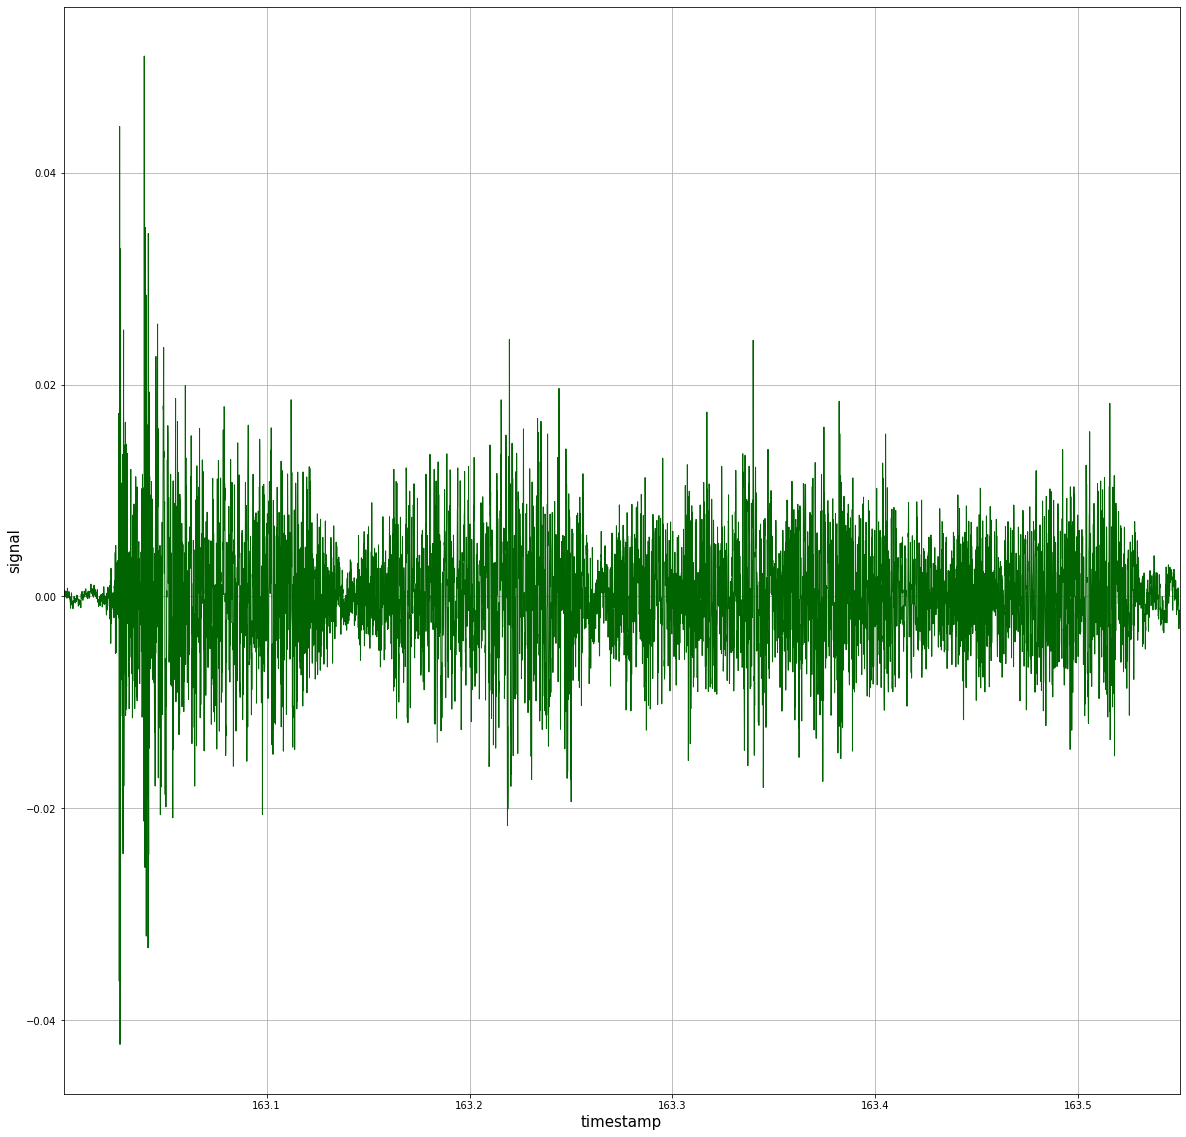

In [9]:
experiment.slice(start_at=163, stop_at=163.55, inplace=False).plot('signal', linewidth=1, figsize=(20, 20));

## Apply matrix profiling methods

In [10]:
rows_per_second = int(len(full_recording) / audio_duration_sec)
print(f"{rows_per_second=}")

rows_per_second=16000


In [ ]:
%%time
experiment.matrix_profile_univariate(windows=rows_per_second, col_names='signal')